In [173]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from aux_function_SR import read_data, get_eq_filtered, SR_SENSORS
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_log_level, save, load
import logging
import pandas as pd
from datetime import datetime, timedelta
import pickle
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast

set_log_level("ERROR")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
delta = timedelta(
    minutes=30,
)
# Read SR and EQ data
df = read_data("data/SR_table_EarthQuake_v3_std.mat")
arrays = (
    pd.DataFrame(df["NS_mean"])
    .applymap(lambda x: np.array(x, dtype=np.float32))
    .to_numpy()
)
# Adatpt to NeuralProphet input data
NS_mean = np.array(np.stack([np.stack(a[0].squeeze()) for a in arrays]))
# Create datetime Array
pd.date_range(start="2018-09-09", end="2020-02-02")
ds = pd.date_range(start="2016-01-01", end="2021-01-01", freq="30min")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'data/SR_table_EarthQuake_v3_std.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Convert 0,1 column to EQ events
# events_eq = ds[earthquake_raw > 0.0]

# Create the prior dataframe
df_regressor = pd.DataFrame(
    {
        "ds": ds,
        "S0": NS_mean[:, 0],
        "S1": NS_mean[:, 1],
        "S2": NS_mean[:, 2],
        "S3": NS_mean[:, 3],
        "S4": NS_mean[:, 4],
        "S5": NS_mean[:, 5],
        "S6": NS_mean[:, 6],
        "S7": NS_mean[:, 7],
        "S8": NS_mean[:, 8],
        "S9": NS_mean[:, 9],
    }
)

In [ ]:
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast

config_npw_d = {
    "forecast_length": timedelta(hours=24),
    "freq": timedelta(minutes=30),
    "question_mark_length": timedelta(hours=24),
    "num_hidden_layers": 2,
    "learning_rate": 0.05,
    "n_lags": 48,
    "d_hidden": 16,
}
config_npw = ConfigNPw(**config_npw_d)

ConfigEQ_d = {
    "mag_array": df["mag"].to_numpy(),
    "dist_array": df["dist"].to_numpy(),
    "lat_array": df["lat"].to_numpy(),
    "arc_array": df["arc"].to_numpy(),
    "dist_start": 4000,
    "dist_delta": 2000,
    "dist_max": 6000,
    "lat_max": 360,
    "arc_max": 60,
    "mag_start": 0.5,
    "mag_delta": 1,
    "dist_perct": 1000,
}
config_events = ConfigEQ(**ConfigEQ_d)

In [ ]:
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast

config_npw_d = {
    "forecast_length": timedelta(hours=24),
    "freq": timedelta(minutes=30),
    "question_mark_length": timedelta(hours=24),
    "num_hidden_layers": 2,
    "learning_rate": 0.01,
    "n_lags": 5 * 48,
    "d_hidden": 16,
}
config_npw = ConfigNPw(**config_npw_d)

ConfigEQ_d = {
    "mag_array": df["mag"].to_numpy(),
    "dist_array": df["dist"].to_numpy(),
    "lat_array": df["lat"].to_numpy(),
    "arc_array": df["arc"].to_numpy(),
    "dist_start": 4000,
    "dist_delta": 2000,
    "dist_max": 6000,
    "lat_max": 360,
    "arc_max": 60,
    "mag_start": 0.5,
    "mag_delta": 1,
    "dist_perct": 1000,
}
config_events = ConfigEQ(**ConfigEQ_d)

In [ ]:
import requests
from dateutil.relativedelta import *

hours_offsets = [-3 * 24, 6, 12]
event_offsets = [None, -timedelta(hours=6), -timedelta(hours=12)]
# start_day  = datetime.fromisoformat('2018-01-01T10:00:00');
days = list(range(3))
start_day = datetime.fromisoformat("2019-01-01T10:00:00")
n_months = 1
sites = list()
for i in range(n_months):
    start_date = start_day + i * relativedelta(months=+1)
    sites.append(start_date)


def NPw_parallel(start_day):
    NPw_o = NPw(config_npw, df_regressor, config_events)
    day = NPw_o.get_next_event(start_day)
    test_metrics = NPw_o.predict_with_offset_hours(day, hours_offsets, event_offsets)
    NPw_o.save_df(day.strftime("%m_%d_%Y_%H_%M_%S"))
    return day.strftime("%m_%d_%Y_%H_%M_%S")  # test_metrics


for test_metrics in map(NPw_parallel, sites):
    print(test_metrics)

In [ ]:
from datetime import datetime, timedelta
from dateutil.relativedelta import *

start_day = datetime.fromisoformat("2018-01-01T10:00:00")
sites = []
for i in range(7):
    start_date = start_day + i * relativedelta(months=+6)
    print(start_date)
    sites.append(start_date)

days = datetime.fromisoformat("2017-01-01T10:00:00")
for index_delta in range(n_dates):
    start_date = days + index_delta * relativedelta(months=+6)
    print(start_date)
# sites = [(index_day * relativedelta(month=+6)) for index_day in days]
sites

In [8]:
NPw_o.save_df()

In [11]:
NPw_o.save_df()

In [16]:
event_offset = -timedelta(hours=24)
print(
    "EVENT: "
    + str(event_date)
    + " date: "
    + str(current_date)
    + " Offset: "
    + str(event_offset)
)
config_fc = ConfigForecast(start_forecast=current_date, offset_event=event_offset)
NPw_o.add_forecast(config_fc)

EVENT: 2018-01-04 10:30:00 date: 2018-01-04 22:30:00 Offset: -1 day, 0:00:00


Training: 0it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

0.63430256


In [17]:
event_offset = None
print(
    "EVENT: "
    + str(event_date)
    + " date: "
    + str(current_date)
    + " Offset: "
    + str(event_offset)
)
config_fc = ConfigForecast(start_forecast=current_date, offset_event=event_offset)
NPw_o.add_forecast(config_fc)

EVENT: 2018-01-04 10:30:00 date: 2018-01-04 22:30:00 Offset: None


Training: 0it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

Predicting: 2734it [00:00, ?it/s]

0.5027072


In [538]:
from aux_function_SR import read_data, get_eq_filtered, SR_SENSORS
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_log_level, save, load
import logging
import pandas as pd
from datetime import datetime, timedelta
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast
from dateutil.relativedelta import *

import sys

set_log_level("ERROR")

delta = timedelta(minutes=30)
# Read SR and EQ data
df_SR = read_data("NPdata.mat")
arrays = (
    pd.DataFrame(df_SR["NS_mean"])
    .applymap(lambda x: np.array(x, dtype=np.float32))
    .to_numpy()
)
# Adatpt to NeuralProphet input data
NS_mean = np.array(np.stack([np.stack(a[0].squeeze()) for a in arrays]))
# Create datetime Array
pd.date_range(start="2018-09-09", end="2020-02-02")
ds = pd.date_range(start="2016-01-01", end="2021-01-01", freq="30min")
# Create the prior dataframe
df_regressor = pd.DataFrame(
    {
        "ds": ds,
        "S0": NS_mean[:, 0],
        "S1": NS_mean[:, 1],
        "S2": NS_mean[:, 2],
        "S3": NS_mean[:, 3],
        "S4": NS_mean[:, 4],
        "S5": NS_mean[:, 5],
        "S6": NS_mean[:, 6],
        "S7": NS_mean[:, 7],
        "S8": NS_mean[:, 8],
        "S9": NS_mean[:, 9],
    }
)

config_npw_d = {
    "forecast_length": timedelta(hours=24),
    "freq": timedelta(minutes=30),
    "question_mark_length": timedelta(hours=24),
    "num_hidden_layers": 2,
    "learning_rate": 0.01,
    "n_lags": 5 * 48,
    "d_hidden": 16,
    "verbose": False,
    "epochs": 1,
    "gpu": False,
}
config_npw = ConfigNPw(**config_npw_d)

ConfigEQ_d = {
    "mag_array": df_SR["mag"].to_numpy(),
    "dist_array": df_SR["dist"].to_numpy(),
    "lat_array": df_SR["lat"].to_numpy(),
    "arc_array": df_SR["arc"].to_numpy(),
    "dist_start": 5000,
    "dist_delta": 2000,
    "dist_max": 6000,
    "lat_max": 360,
    "arc_max": 60,
    "mag_start": 0.5,
    "mag_delta": 1.5,
    "dist_perct": 1000,
}
config_events = ConfigEQ(**ConfigEQ_d)

hours_offsets = [-3 * 24, 12, 24]
event_offsets = [None, -timedelta(hours=12), -timedelta(hours=24)]

NPw_o = NPw(config_npw, df_regressor, config_events)
NPw_o.get_df_from_folder("../Result/daily_5")
NPw_o_server = NPw(config_npw, df_regressor, config_events)
NPw_o_server.get_df_from_folder("../Result/server")
NPw_test = NPw(config_npw, df_regressor, config_events)
NPw_test.get_df_from_folder("../Result/daily_5_test")

In [539]:
df_pre = NPw_o.pre_binary_perform_fast("MSE")
print(df_pre)
df_test = NPw_test.pre_binary_perform_fast("MSE")
print(np.sum(df_test))

                 dates  predicted_class
0  2017-12-17 10:00:00                1
0  2017-12-18 10:00:00                1
0  2017-12-19 10:00:00                0
0  2017-12-20 10:00:00                1
0  2017-12-21 10:00:00                1
..                 ...              ...
0  2017-08-26 10:00:00                1
0  2017-08-27 10:00:00                0
0  2017-08-28 10:00:00                1
0  2017-08-29 10:00:00                0
0  2017-08-30 10:00:00                1

[116 rows x 2 columns]
predicted_class    14
dtype: int64


In [613]:
df = NPw_o.get_binary_perform_fast(df_pre,24, 0)
df

(array([0.47368421, 0.61904762, 0.28888889]),
 array([[45, 50],
        [ 8, 13]], dtype=int64))

In [541]:
df_out = NPw_o_server.get_binary_results("MSE", 24, 0, config_events)
NPw.print_df(df_out.head())

,ref,best_class,actual_class,predicted_class,type,diff_metrics,n_classes,event_MSE_0,event_MSE_1,dates,dist,mag,arc,dif_event
date,,,,,,,,,,,,,,
2017-01-03 02:30:00,72.0,2,0,1,FP,0.206315,3,-0.206315,-0.329749,2017-01-06 02:30:00,5.244188,5.0,0.900272,72.0
2017-01-06 14:30:00,-12.0,2,1,1,TP,0.000000,3,-0.002433,-0.062892,2017-01-06 02:30:00,5.244188,5.0,0.900272,-12.0
2017-01-07 02:30:00,-24.0,0,1,0,TP,0.009468,3,0.009468,0.078812,2017-01-06 02:30:00,5.244188,5.0,0.900272,-24.0
2017-02-02 13:30:00,-61.0,1,0,1,FP,0.005737,3,-0.005737,0.099728,2017-01-31 00:30:00,3.052942,5.4,0.965393,-61.0
2017-02-06 01:30:00,2.0,2,0,1,FP,0.006310,3,0.006310,-0.272433,2017-02-06 03:30:00,2.510291,5.3,0.998784,2.0


In [371]:
import pygad

In [372]:
a = np.array([1,2,3])
np.append(a , 4)

array([1, 2, 3, 4])

In [373]:
weight_outputs = np.array([1,1,2])
desired_output = 2.5
print(desired_output)

2.5


In [374]:

desired_output = 2
range_dist_start = list(range(2000,6000,500))
range_dist_delta = list(range(500,5000,500))
range_dist_max = list(range(5000,14000,1000))                
mag_start = list(np.linspace(5.5, 8 ,10))
mag_delta = list(np.linspace(0.5, 2 ,1))
arc_max = list(range(30,90,15))    

In [402]:
df_pre = NPw_o.pre_binary_perform_fast("MSE")

df_test = NPw_test.pre_binary_perform_fast("MSE")
df_ga = df_pre
def get_config_from_solution(solution):
    ConfigEQ_d = {
    "mag_array": df_SR["mag"].to_numpy(),
    "dist_array": df_SR["dist"].to_numpy(),
    "lat_array": df_SR["lat"].to_numpy(),
    "arc_array": df_SR["arc"].to_numpy(),
    "dist_start": solution[1], #4000
    "dist_delta": solution[2], # 2000
    "dist_max": solution[3], #7000
    "lat_max": 360,
    "arc_max": solution[6],
    "mag_start": solution[4],
    "mag_delta": solution[5],
    "dist_perct": 1000,
    }
    config_events = ConfigEQ(**ConfigEQ_d)
    return config_events
def fitness_func(solution, solution_idx):
    config_events = get_config_from_solution(solution)
    (uutput, cm) = NPw_o.get_binary_perform_fast(df_ga,np.abs(np.round(solution[0])).astype(int), 0, config_events)
    fitness = 1.0 / np.abs(np.sum(output * weight_outputs ) - desired_output)
    return fitness

In [416]:
itness_function = fitness_func

num_generations = 40
num_parents_mating = 8

sol_per_pop = 100
gene_space = [[24],  range_dist_start, range_dist_delta, range_dist_max, mag_start, mag_delta,arc_max]
num_genes = len(gene_space)

init_range_low = 0
init_range_high = 48

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "uniform"

mutation_type = "random"
mutation_percent_genes = 10


In [417]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       gene_space= gene_space,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

In [418]:
ga_instance.run()

In [419]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [2.40000000e+01 5.50000000e+03 5.00000000e+02 1.00000000e+04
 5.77777778e+00 5.00000000e-01 3.00000000e+01]
Fitness value of the best solution = 6.874999999999997


In [593]:
df_ga = df_pre
config_events = get_config_from_solution(solution)
output, cm = NPw_o.get_binary_perform_fast(df_ga,np.abs(np.round(solution[0])).astype(int), 0, config_events)
print(output)
print(cm)
#fitness_func(solution,51) 

[0.48039216 0.71428571 0.20408163]
[[49 53]
 [ 4 10]]


In [591]:
df_ga = df_test
config_events = get_config_from_solution(solution)
output, cm = NPw_o.get_binary_perform_fast(df_ga,np.abs(np.round(solution[0])).astype(int), 0, config_events)
print(output)
print(cm)
#fitness_func(solution,52) 

[0.45454545 1.         0.2       ]
[[10 12]
 [ 0  2]]


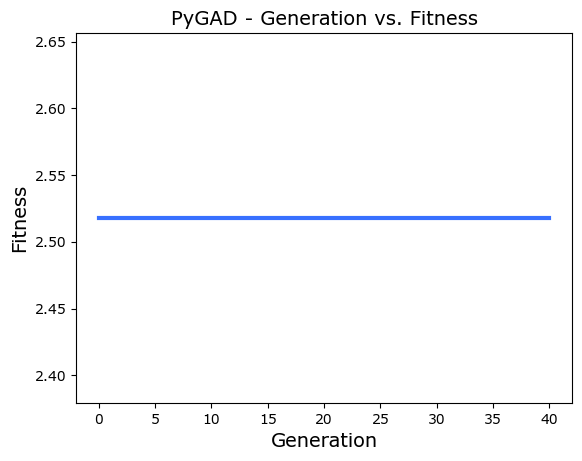

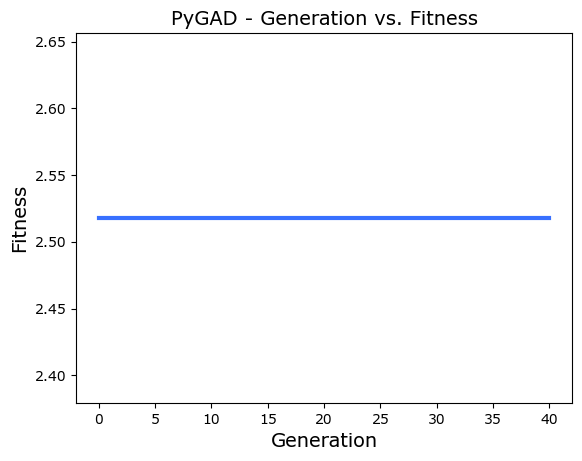

In [409]:
ga_instance.plot_fitness()

In [635]:
import dalex as dx

import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')
data =  NPw_o.get_binary_results("MSE",np.abs(np.round(solution[0])).astype(int), 0)
#data =  NPw_o_server.get_binary_results("MSE",np.abs(np.round(solution[0])).astype(int), 0)
event_in_range = [int(int(a) in range(-24, 0)) for a in data["dif_event"]]
X_class = data.drop(columns=["ref",  "actual_class", "predicted_class", "n_classes", "dates", "type"])
print(X.columns)
y_class = ( data["predicted_class"]).astype(int)


X_class["dif_event"] = (X_class["dif_event"].astype(int))


Index(['best_class', 'event_MSE_0', 'dist', 'mag', 'arc', 'dif_event'], dtype='object')


In [636]:
numerical_features = 'dist', 'mag', 'arc', "dif_event"
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median', fill_value=0)),
        ('scaler', StandardScaler())
    ]
)
categorical_features = [ "event_in_range"]
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        #('cat', categorical_transformer, categorical_features)
    ]
)
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500, random_state=0)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])

In [637]:
clf.fit(X_class, y_class)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ('dist', 'mag', 'arc',
                                                   'dif_event'))])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=500,
                               random_state=0))])

In [638]:
exp = dx.Explainer(clf, X_class, y_class)

Preparation of a new explainer is initiated

  -> data              : 116 rows 7 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 116 values
  -> data              : A column identical to the target variable `y` has been found in the `data`.
  -> data              : It is highly recommended to pass `data` without the target variable column.
  -> model_class       : sklearn.neural_network._multilayer_perceptron.MLPClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002341B519790> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 2.12e-29, mean = 0.543, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals        

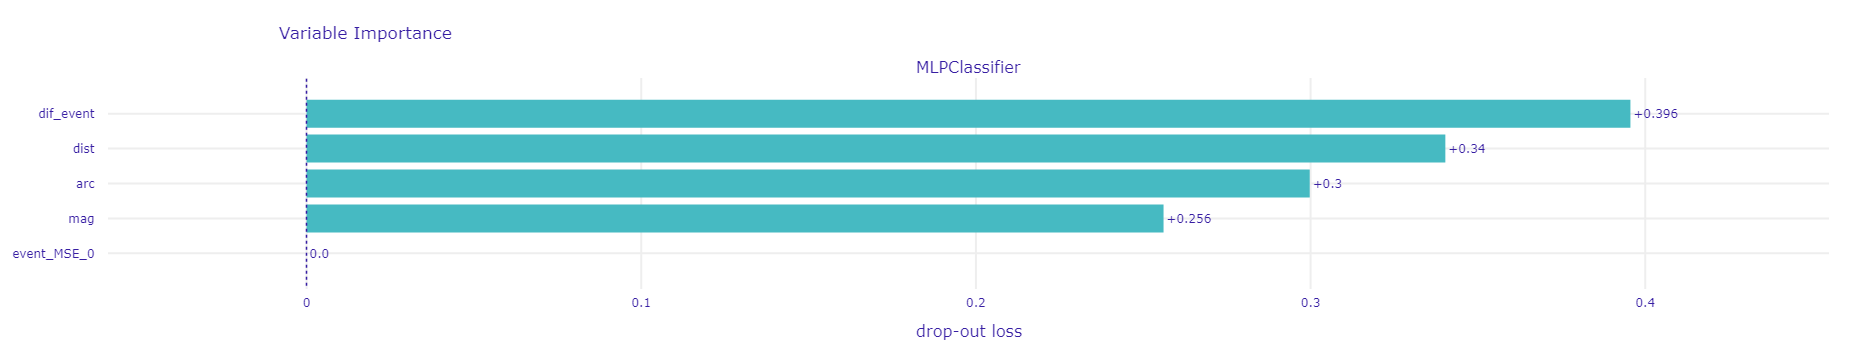

In [ ]:
vi = exp.model_parts()
vi.result
vi.plot(max_vars=5)

In [627]:
pdp_num = exp.model_profile(type = 'partial', label="pdp")
ale_num = exp.model_profile(type = 'accumulated', label="ale")

Calculating accumulated dependency: 100%|████████████████████████████████████████████████| 7/7 [00:00<00:00, 20.49it/s]


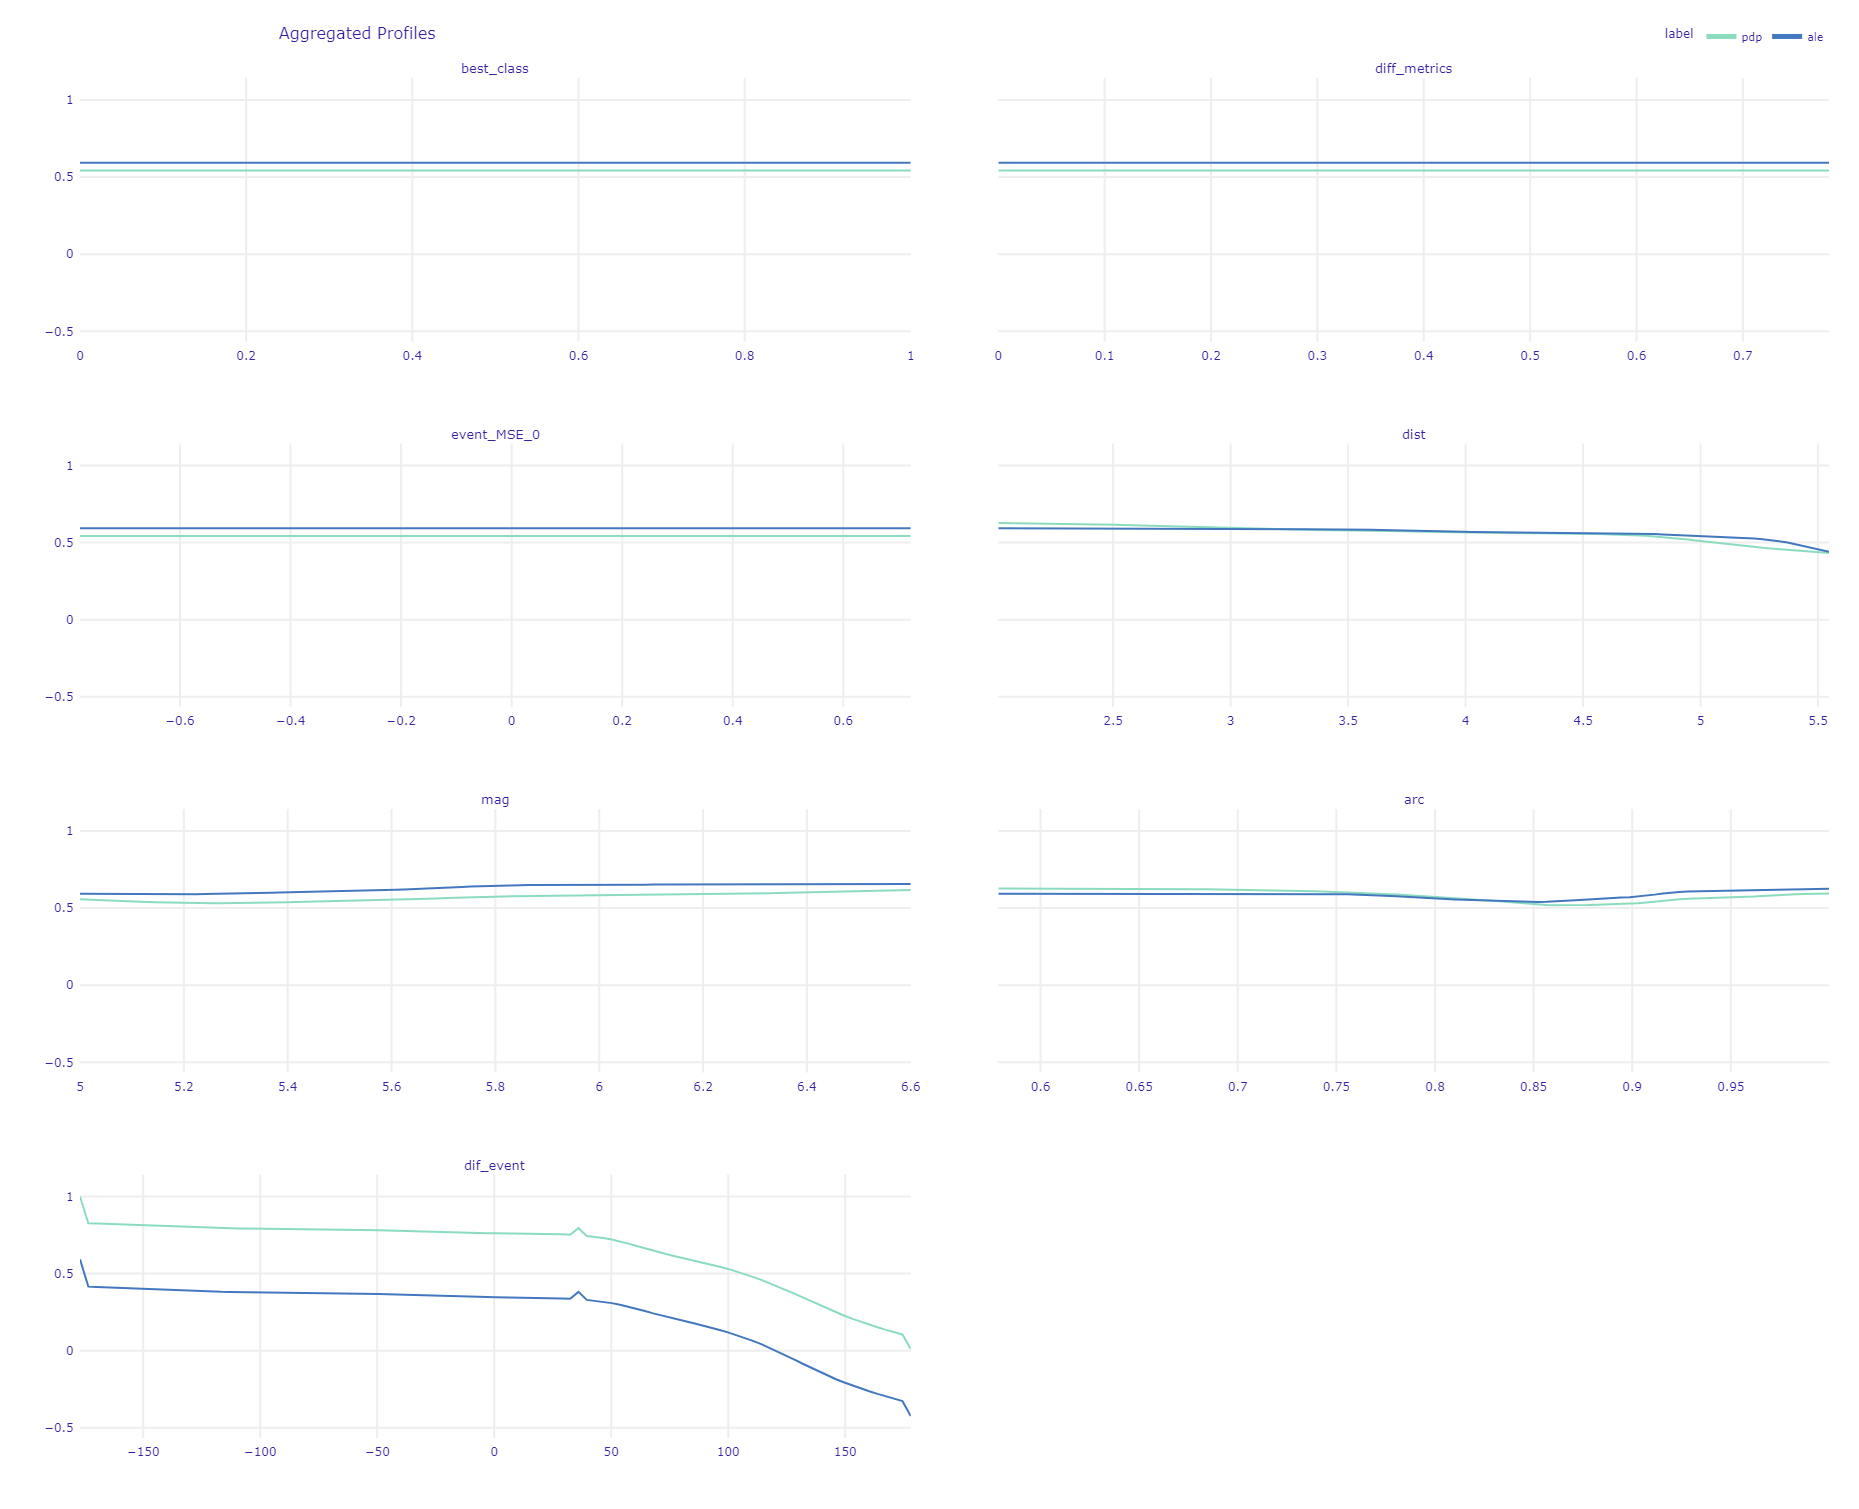

In [620]:
pdp_num.plot(ale_num)

In [659]:
from sklearn.ensemble import GradientBoostingRegressor
warnings.filterwarnings('ignore')
data =  NPw_o.get_binary_results("MSE",np.abs(np.round(solution[0])).astype(int), 0)
event_in_range = [int(int(a) in range(-24, 0)) for a in data["dif_event"]]
data["event_in_range"] = event_in_range
X_reg = data.drop(columns=["ref","diff_metrics",  "actual_class", "predicted_class", "n_classes", "dates", "type"])
print(X.columns)
y_reg = np.array(data["diff_metrics"])




numerical_features = 'dist', 'mag', 'arc', "dif_event"
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median', fill_value=0)),
        ('scaler', StandardScaler())
    ]
)
categorical_features = ["event_in_range"]
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
       # ('cat', categorical_transformer, categorical_features)
    ]
)
model = GradientBoostingRegressor()
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', model)])


X_reg["dif_event"] = (X_reg["dif_event"].astype(int))

Index(['best_class', 'event_MSE_0', 'dist', 'mag', 'arc', 'dif_event'], dtype='object')


In [660]:

reg.fit(X_reg, y_reg)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ('dist', 'mag', 'arc',
                                                   'dif_event'))])),
                ('regression', GradientBoostingRegressor())])

Preparation of a new explainer is initiated

  -> data              : 116 rows 7 cols
  -> target variable   : 116 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x000002341B519550> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = -0.0236, mean = 0.0543, max = 0.722
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0812, mean = -2.15e-18, max = 0.194
  -> model_info        : package sklearn

A new explainer has been created!


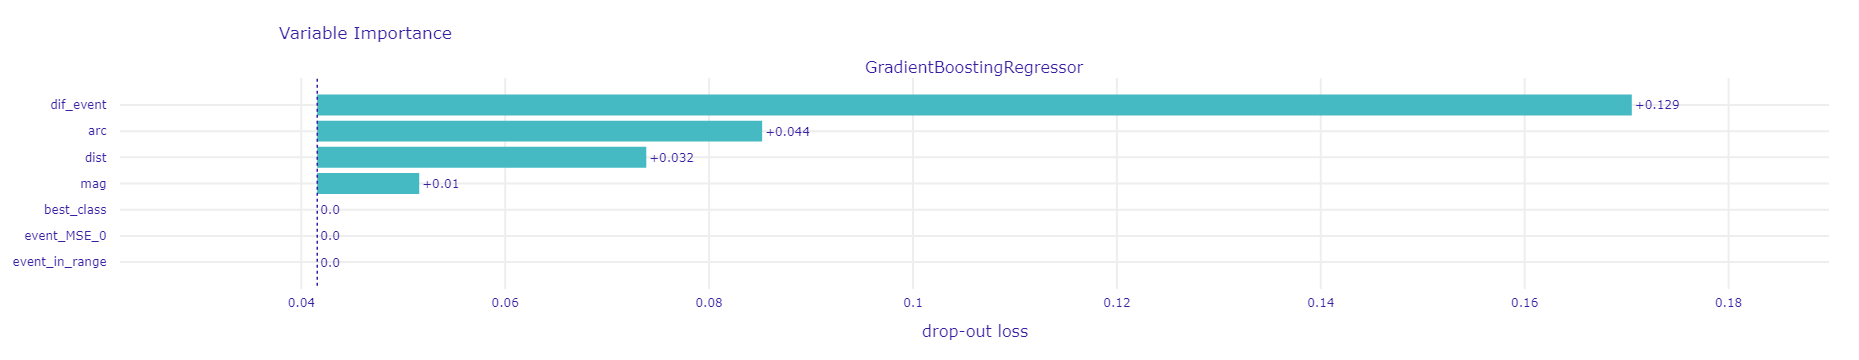

In [661]:
exp_reg = dx.Explainer(reg, X_reg, y_reg)
vi = exp_reg.model_parts()
vi.result
vi.plot(max_vars=10)

Calculating accumulated dependency: 100%|████████████████████████████████████████████████| 7/7 [00:00<00:00, 22.09it/s]


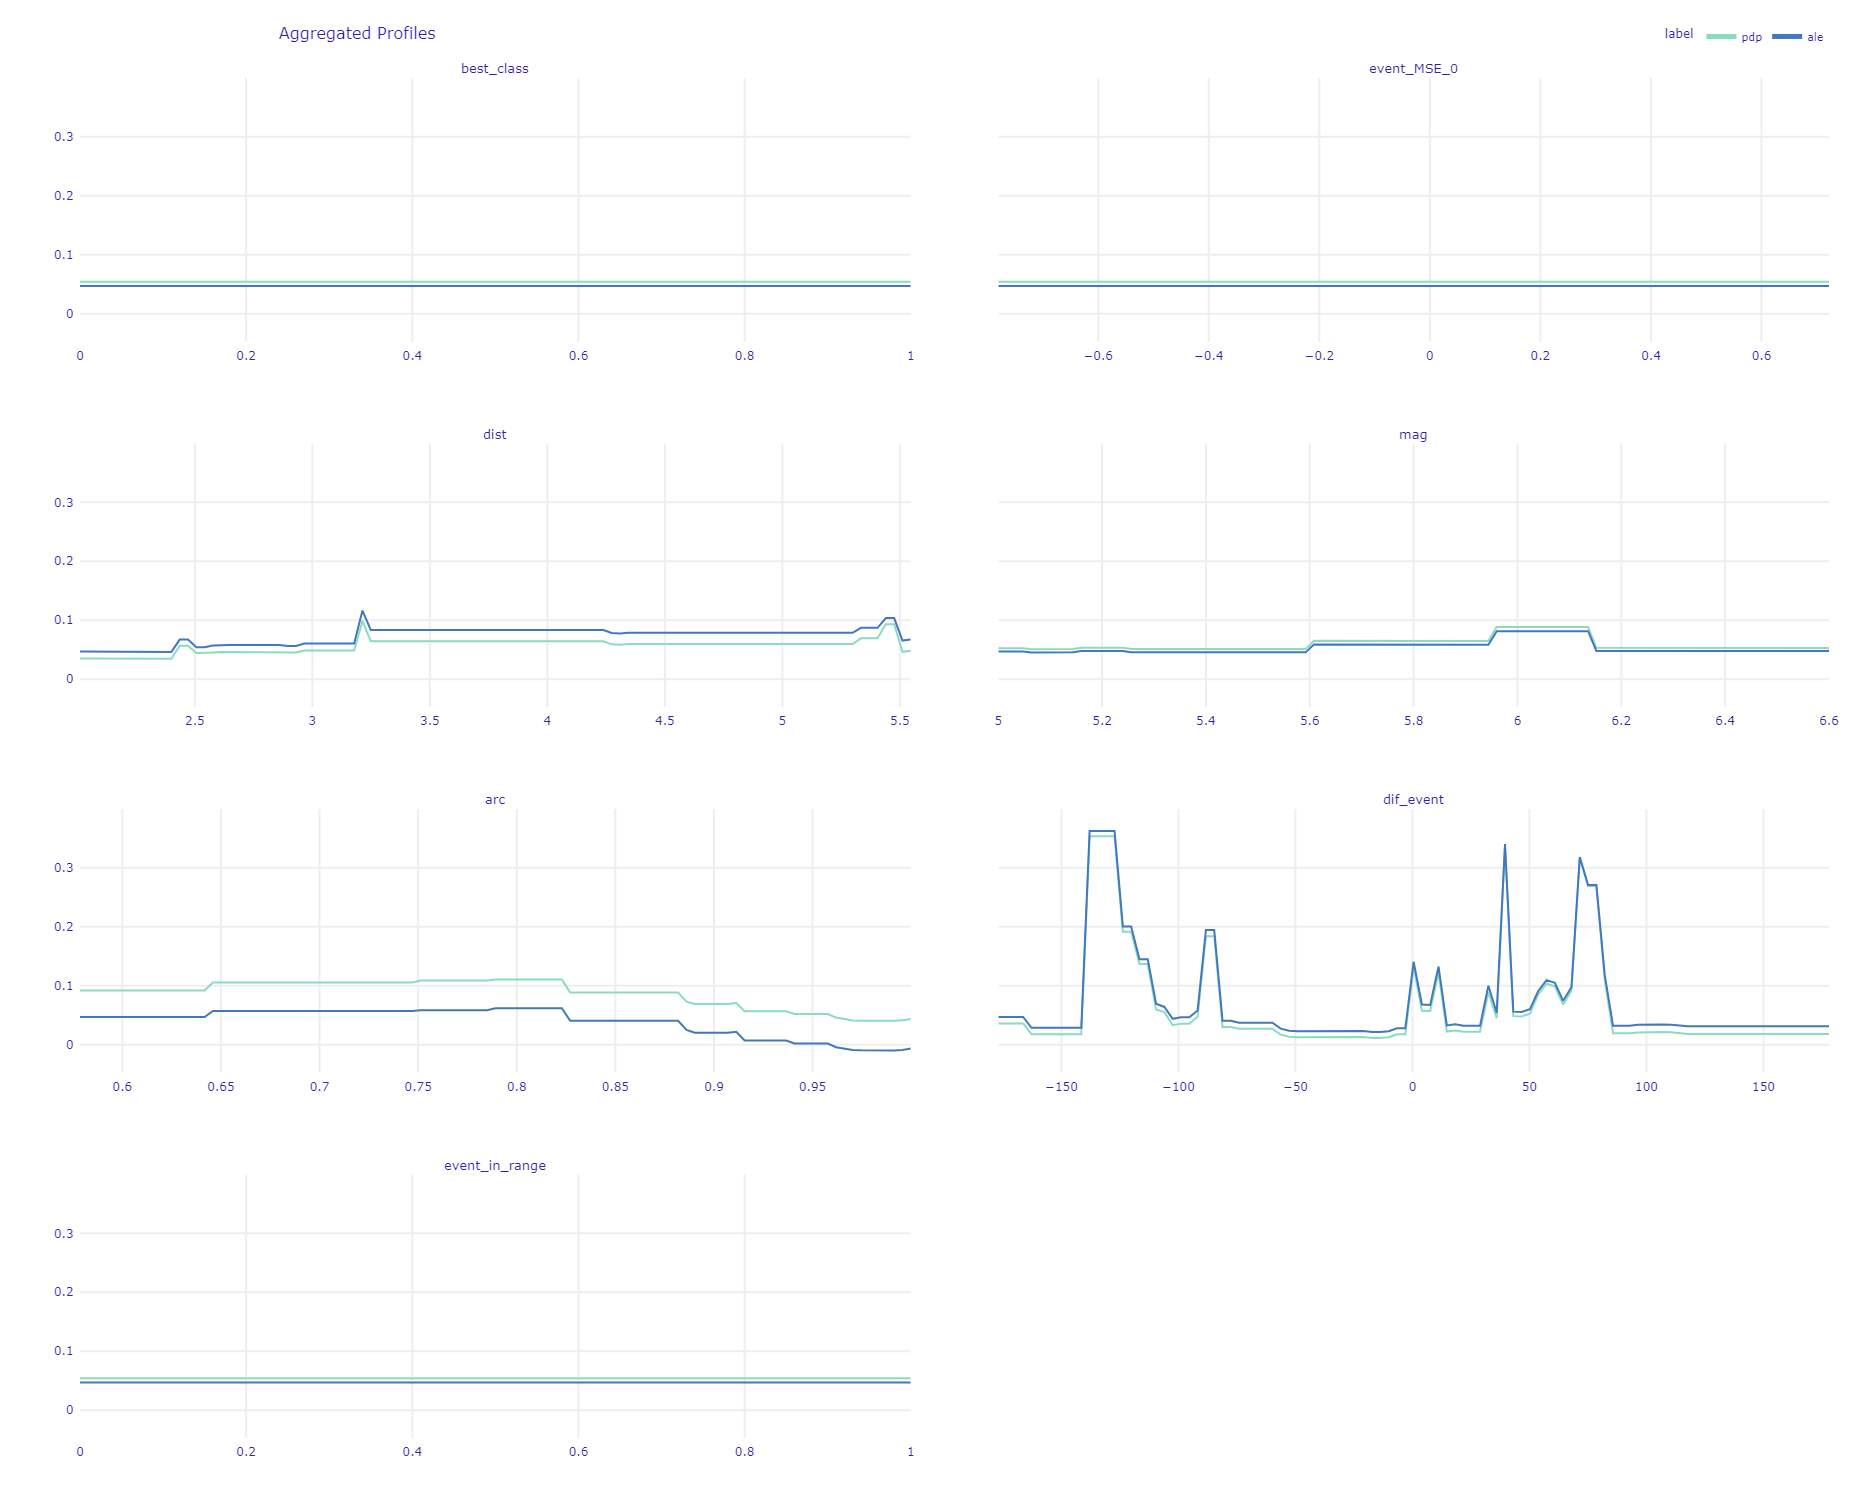

In [662]:
pdp_num = exp_reg.model_profile(type = 'partial', label="pdp")
ale_num = exp_reg.model_profile(type = 'accumulated', label="ale")
pdp_num.plot(ale_num)